<a href="https://colab.research.google.com/github/MohammedAL-Ani/GD-with-TSP-using-Python/blob/main/TSP_moh_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TSP moh-(GD)

## GREAT DELUGE ALGORITHM GDA Pseudocode
```
Input: Level L.
s = s0 ; /∗ Generation of the initial solution ∗/ 
Choose the initial water level LEVEL ; 
Set an estimated quality of the final solution EST_QUALITY ;
Set a maximum number of iteration MAX_ITER ;
UP  = (LEVEL-EST_QUALITY)/MAX_ITER ; 
Repeat
	Generate a random neighbor s′ ;
	If f(s′) < LEVEL Then s = s′ /∗ Accept the neighbor 	solution ∗/ 
	LEVEL = LEVEL − UP ; /∗ update the water level ∗/
Until Stopping criterion satisfied 
Output: Best solution found.

```

## Main function

In [ ]:
# coding: utf-8
import sys
import time 
import math
import random

def ReadDic(dicPath = './dataset.txt'):
    dic={}
    with open(dicPath) as f:
        r=f.read()
        read_line = r.split('\n')                      
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))        
        f.close()
    return dic

def initial(num): ## generate init city sequence (initial solution)
    seq = []
    while len(seq) < num:
        temp = random.randint(1,num)
        if temp not in seq:
            seq.append(temp)
            
    return seq

def cost(seq,dic):    
    dist = 0
    for i in range(len(seq)):
        axis = [ dic[seq[i]][0]-dic[seq[(i+1)%len(seq)]][0],dic[seq[i]][1]-dic[seq[(i+1)%len(seq)]][1]]
        dist += math.sqrt(axis[0]*axis[0]+axis[1]*axis[1])  # distance(d)
    return dist

def swap(swap_num,c):
    c = c.copy()
    def selectIndexs(swap_num=swap_num,c=c):
        c = c.copy()
        swIndexs = []
        while(len(swIndexs) != swap_num):
            ranIndex = random.randint(0,len(c)-1)
            if ranIndex not in swIndexs:
                swIndexs.append(ranIndex)
        return swIndexs
    swIndexs1 = selectIndexs()
    swIndexs2 = selectIndexs()
    
    for i in range(len(swIndexs1)):
        tmp = c[swIndexs1[i]]
        c[swIndexs1[i]] = c[swIndexs2[i]]
        c[swIndexs2[i]] = tmp
    return c.copy()


In [ ]:
NUM_CITIES = 30
DIC = ReadDic()

## INIT

In [ ]:
pathSeq = initial(NUM_CITIES)
print('Path:',pathSeq,'\nCost=',cost(pathSeq,DIC))

Path: [14, 16, 25, 1, 11, 28, 15, 13, 17, 8, 18, 3, 21, 24, 6, 7, 26, 22, 20, 10, 23, 4, 29, 27, 19, 30, 12, 9, 5, 2] 
Cost= 931.0797712498703


In [ ]:
currentPath = pathSeq.copy()
currentVal = cost(currentPath,DIC)
nextPath = currentPath.copy()
nextVal = currentVal

BestSolution = currentPath.copy()
BestSolutionVal = currentVal

## GDA-Algorithm

In [ ]:
valRec2 = []
border = []

LEVEL = currentVal
iniLevel = LEVEL
EST_QUALITY = 500
MAX_ITER = 1500
iniMaxIter = MAX_ITER
border.append(LEVEL)
UP = (LEVEL - EST_QUALITY)/MAX_ITER

valRec2.append(currentVal)    

while(MAX_ITER > 0):
    nextPath = swap(3,currentPath)
    nextVal = cost(nextPath,DIC)
    if(nextVal <= LEVEL):
        currentPath = nextPath.copy()
        currentVal = nextVal                
      
    
    if(currentVal < BestSolutionVal):
        BestSolution = currentPath.copy() # To keep the best solution
        BestSolutionVal = currentVal
    valRec2.append(currentVal)            
    LEVEL -= UP            
    border.append(LEVEL)
    MAX_ITER -= 1
    

print('lastsol:',currentPath,'\nCost=',currentVal,'\n')
print('Bestsol:',BestSolution,'\nCost=', BestSolutionVal)

lastsol: [14, 18, 30, 9, 4, 13, 19, 17, 25, 23, 8, 26, 24, 22, 16, 2, 20, 3, 28, 29, 12, 5, 15, 10, 11, 27, 1, 21, 7, 6] 
Cost= 567.0789620892673 

Bestsol: [14, 25, 13, 19, 4, 18, 15, 10, 17, 5, 27, 24, 26, 16, 3, 28, 2, 21, 8, 7, 23, 1, 11, 9, 12, 30, 29, 20, 22, 6] 
Cost= 538.9344135509135


# PLOT

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
# from core import *

def showPlot(PATH_SEQ,title):
    #Read
    DIC = ReadDic()
    with open('./dataset.txt','r') as f:
        dataset = f.read()
    dataset = dataset.split("\n")

    # x y
    x=[]
    y=[]
    for i in dataset:
        newi = i.split(" ")
        x.append(int(newi[1]))
        y.append(int(newi[2]))

    myX = []
    myY = []
    myPath = PATH_SEQ
    for i in myPath:
        _x,_y = DIC[i]
        myX.append(_x)
        myY.append(_y)

    # matplotlib.rcParams['axes.unicode_minus'] = False
    fig, ax = plt.subplots(figsize=(15,7))
    
    ax.plot(x, y, 'o',color ='chartreuse')
    
    ax.set_title(title,color='blue')
    plt.plot(myX,myY,linestyle='--',color='maroon')
    
    plt.show()

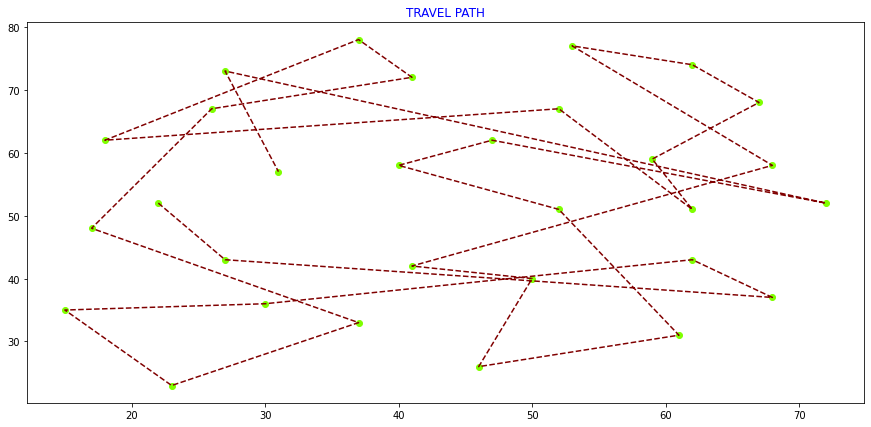

In [ ]:
showPlot(currentPath,'TRAVEL PATH')

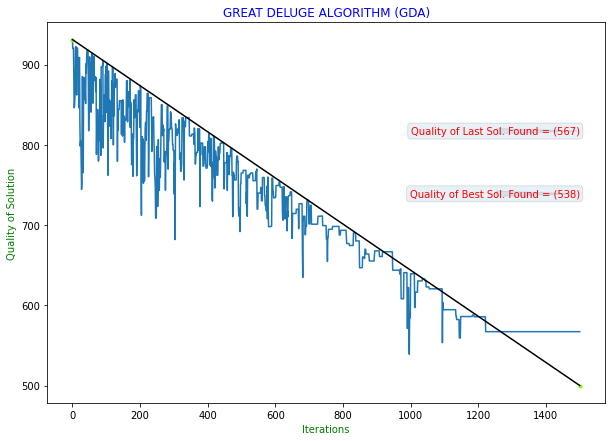

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(valRec2) #valRec1
#---------------------------
xb = [0, iniMaxIter]
yb = [iniLevel, EST_QUALITY]
#----------------------------
plt.plot(xb, yb, '.',color ='chartreuse')
plt.plot(border,color ='black')

plt.title('GREAT DELUGE ALGORITHM (GDA)',color='blue')
plt.xlabel('Iterations',color ='green')
plt.ylabel('Quality of Solution',color ='green')
plt.annotate('Quality of Last Sol. Found = (%.2d)'%( currentVal), xy=(iniMaxIter, currentVal+250),
             color="red",xycoords='data',size=10, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))
plt.annotate('Quality of Best Sol. Found = (%.2d)'%( BestSolutionVal), xy=(iniMaxIter, BestSolutionVal+200),
             color="red",xycoords='data',size=10, ha='right', va="center", bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))
#plt.annotate('Quality of Last Sol. Found = (%.2d)'%( currentVal), xy=(c, currentVal+200),color="red")
#plt.annotate('Quality of Best Sol. Found = (%.2d)'%( BestSolutionVal), xy=(c, currentVal+50),color="red")
plt.show()